# Lab 3
Konstantinos Konstantinidis AEM:2546

# Evaluating a classification model

\begin{exercise}
Evaluate the Naive Bayes classification model for the `titanic_trainc.csv` dataset by applying the following  classification metrics, and summarize the performance of the model. 

\end{exercise}


## Learning Goals

- What is the purpose of **model evaluation**, and what are some common evaluation procedures?
- What is the usage of **classification accuracy**, and what are its limitations?
- How does a **confusion matrix** describe the performance of a classifier?
- What **metrics** can be computed from a confusion matrix?
- How can you adjust classifier performance by **changing the classification threshold**?
- What is the purpose of an **ROC curve**?
- How does **Area Under the Curve (AUC)** differ from classification accuracy?
- what is Kfold verification method?

## Review of model evaluation

- Need a way to choose between models: different model types, tuning parameters, and features
- Use a **model evaluation procedure** to estimate how well a model will generalize to out-of-sample data
- Requires a **model evaluation metric** to quantify the model performance

### Model evaluation procedures

1. **Training and testing on the same data**
    - Rewards overly complex models that "overfit" the training data and won't necessarily generalize
2. **Train/test split**
    - Split the dataset into two pieces, so that the model can be trained and tested on different data
    - Better estimate of out-of-sample performance, but still a "high variance" estimate
    - Useful due to its speed, simplicity, and flexibility
3. **K-fold cross-validation**
    - Systematically create "K" train/test splits and average the results together
    - Even better estimate of out-of-sample performance
    - Runs "K" times slower than train/test split

### Model evaluation metrics

- **Regression problems:** Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- **Classification problems:** Classification accuracy

## Classification accuracy

[Pima Indians Diabetes dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) originally from the UCI Machine Learning Repository

# Column Data desctiption
    pregnancies - Number of times pregnant
    
    Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    
    BloodPressure - Diastolic blood pressure (mm Hg)
    
    SkinThickness - Triceps skin fold thickness (mm)
    
    Insulin - 2-Hour serum insulin (mu U/ml)
    
    BMI - Body mass index (weight in kg/(height in m)^2)
    
    DiabetesPedigreeFunction - Diabetes pedigree function
    
    Age - Age (years)
    
    Outcome - Class variable (0 or 1) class value 1 is interpreted as "tested positive for diabetes


In [1]:
# read the data into a pandas DataFrame
import pandas as pd
path = 'titanic_train.csv'
col_names = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
pima = pd.read_csv(path, header=0,names=col_names)
pima.columns = ["V"+str(i) for i in range(1, len(pima.columns)+1)]  # rename column names to be similar to R naming convention


In [2]:
# print the first 5 rows of data
pima.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Question:** Can we predict the diabetes status of a patient given their health measurements?

In [3]:
from sklearn.preprocessing import LabelEncoder

ord_enc = LabelEncoder()

X_numerical=pd.DataFrame()
data_numerical=pd.DataFrame()


for i in range(2,len(pima.columns)+1):
    temp="V"+str(i)
    data_numerical[temp]=ord_enc.fit_transform(pima[temp].astype(str))

data_numerical["V1"]=ord_enc.fit_transform(pima["V1"].astype(str))  

data_numerical=data_numerical.where(~pima.isna(),pima)

data_numerical=data_numerical.fillna(value=data_numerical.mean())

data_numerical

X = data_numerical.loc[:,[ "V1","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12"]]
y = data_numerical.V2
print(X.head())
print("\\\\\\\\")
print(y.head())

    V1  V3   V4  V5    V6  V7  V8   V9  V10   V11  V12
0    0   2  108   1  21.0   1   0  523  174  76.0  2.0
1  111   0  190   0  45.0   1   0  596  199  81.0  0.0
2  222   2  353   0  27.0   0   0  669  197  76.0  2.0
3  333   0  272   0  41.0   1   0   49  142  55.0  2.0
4  444   2   15   1  41.0   0   0  472  211  76.0  2.0
\\\\
0    0
1    1
2    1
3    1
4    0
Name: V2, dtype: int32


In [4]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Kostas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [7]:
# make class predictions for the testing set
y_pred_class = GNB.predict(X_test)

**Classification accuracy:** percentage of correct predictions

In [8]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7802690582959642


**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [9]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    139
1     84
Name: V2, dtype: int64

In [10]:
# calculate the percentage of ones
y_test.mean()

0.37668161434977576

In [11]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6233183856502242

In [12]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6233183856502242

In [13]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)



0    0.623318
Name: V2, dtype: float64

Comparing the **true** and **predicted** response values

In [14]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0]
Pred: [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1]


**Conclusion:**

- Classification accuracy is the **easiest classification metric to understand**
- But, it does not tell you the **underlying distribution** of response values
- And, it does not tell you what **"types" of errors** your classifier is making

## Confusion matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.


<img src="https://i.ytimg.com/vi/AOIkPnKu0YA/maxresdefault.jpg" />

In [15]:
# IMPORTANT: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(metrics.confusion_matrix(y_test, y_pred_class))

[[106  33]
 [ 16  68]]


![Small confusion matrix](images/09_confusion_matrix_1.png)

- Every observation in the testing set is represented in **exactly one box**
- It's a 2x2 matrix because there are **2 response classes**
- The format shown here is **not** universal

**Basic terminology**

- **True Positives (TP):** we *correctly* predicted that they *do* have diabetes
- **True Negatives (TN):** we *correctly* predicted that they *don't* have diabetes
- **False Positives (FP):** we *incorrectly* predicted that they *do* have diabetes (a "Type I error")
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have diabetes (a "Type II error")

In [16]:
# Importing the dependancies
from sklearn import metrics
# Predicted values
y_pred = ["a", "b", "c", "a", "b"]
# Actual values
y_act = ["a", "b", "c", "c", "a"]
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_act, y_pred, labels=["a", "b", "c"]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_act, y_pred, labels=["a", 
"b","c"]))

[[1 1 0]
 [0 1 0]
 [1 0 1]]
              precision    recall  f1-score   support

           a       0.50      0.50      0.50         2
           b       0.50      1.00      0.67         1
           c       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.67      0.67      0.61         5
weighted avg       0.70      0.60      0.60         5



In [17]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0]
Pred: [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1]


In [18]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

![Large confusion matrix](images/09_confusion_matrix_2.png)

## Metrics computed from a confusion matrix

### Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?
<img src="https://cdn-images-1.medium.com/max/1600/1*5XuZ_86Rfce3qyLt7XMlhw.png"/>

In [19]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7802690582959642
0.7802690582959642


When to use Accuracy:

Accuracy is a good measure when the target variable classes in the data are nearly balanced. example (60% yes - 40% no)  

### Error 

**Classification Error:** Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [20]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.21973094170403587
0.21973094170403584


### Precision

Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives.
Precision is about being precise

<img src="https://cdn-images-1.medium.com/max/640/1*KhlD7Js9leo0B0zfsIfAIA.png" />

In [21]:
print(TP/float(TP+FP))

0.6732673267326733


### Recall or Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

<img src="https://cdn-images-1.medium.com/max/640/1*a8hkMGVHg3fl4kDmSIDY_A.png" />

In [22]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.8095238095238095
0.8095238095238095


### Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [23]:
print(TN / float(TN + FP))

0.762589928057554


### False Positive Rate
**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [24]:
print(FP / float(TN + FP))

0.23741007194244604


### F1 score

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, <b style="color:red">especially if you have an uneven class distribution</b>

<img src="https://cdn-images-1.medium.com/max/1600/1*UJxVqLnbSj42eRhasKeLOA.png">

**Conclusion:**

- Confusion matrix gives you a **more complete picture** of how your classifier is performing
- Also allows you to compute various **classification metrics**, and these metrics can guide your model selection

**Which metrics should you focus on?**

- Choice of metric depends on your **business objective**
- **Spam filter** (positive class is "spam"): Optimize for **precision or specificity** because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- **Fraudulent transaction detector** (positive class is "fraud"): Optimize for **sensitivity** because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

## Adjusting the classification threshold
### Probability Predictions
Another type of prediction you may wish to make is the probability of the data instance belonging to each class.

This is called a probability prediction where given a new instance, the model returns the probability for each outcome class as a value between 0 and 1.

You can make these types of predictions in scikit-learn by calling the `predict_proba()` function, for example:



In [25]:
# print the first 10 predicted responses
GNB.predict(X_test)[0:10]

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [26]:
# print the first 10 predicted probabilities of class membership
GNB.predict_proba(X_test)[0:10, :]

array([[7.33019433e-01, 2.66980567e-01],
       [9.73253459e-01, 2.67465410e-02],
       [9.99977945e-01, 2.20545802e-05],
       [4.13867790e-03, 9.95861322e-01],
       [4.62583140e-02, 9.53741686e-01],
       [4.34689599e-01, 5.65310401e-01],
       [4.85064345e-02, 9.51493566e-01],
       [5.30764063e-02, 9.46923594e-01],
       [2.91468606e-02, 9.70853139e-01],
       [6.71991429e-02, 9.32800857e-01]])

* Row: observation

    - Each row, numbers sum to 1
    
* Column: class

  - 2 response classes there 2 columns
    
       - column 0: predicted probability that each observation is a member of class 0
       
       - column 1: predicted probability that each observation is a member of class 1
       
* Importance of predicted probabilities
    - We can rank observations by probability of diabetes
        - Prioritize contacting those with a higher probability

* predict_proba process

    1. Predicts the probabilities
    
    2. Choose the class with the highest probability

* There is a 0.5 classification threshold

    - Class 1 is predicted if probability > 0.5
    
    - Class 0 is predicted if probability < 0.5

In [27]:
# print the first 10 predicted probabilities for class 1
GNB.predict_proba(X_test)[0:10, 1]

array([2.66980567e-01, 2.67465410e-02, 2.20545802e-05, 9.95861322e-01,
       9.53741686e-01, 5.65310401e-01, 9.51493566e-01, 9.46923594e-01,
       9.70853139e-01, 9.32800857e-01])

In [28]:
# store the predicted probabilities for class 1
y_pred_prob = GNB.predict_proba(X_test)[:, 1]

In [29]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

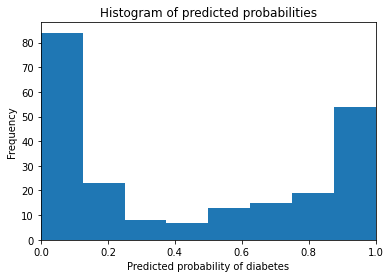

In [30]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

* We can see from the third bar

    - Most  of observations have probability < 0.5
    
    - Small number of observations with probability > 0.5
    
    - This is below the threshold of 0.5
    
    - Most would be predicted "no diabetes" in this case
    
* Solution

    - **Decrease the threshold**  for predicting diabetes
    
        - Increase the sensitivity of the classifier
        
            - This would increase the number of TP
            
            - More sensitive to positive instances
            
            - Example of metal detector
            
                - Threshold set to set off alarm for large object but not tiny objects
                
                - YES: metal, NO: no metal
                
                - We lower the threshold amount of metal to set it off
                
                - It is now more sensitive to metal
                
                - It will then predict YES more often

**Decrease the threshold** for predicting diabetes in order to **increase the sensitivity** of the classifier

In [31]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

C:\Users\Kostas\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [32]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([2.66980567e-01, 2.67465410e-02, 2.20545802e-05, 9.95861322e-01,
       9.53741686e-01, 5.65310401e-01, 9.51493566e-01, 9.46923594e-01,
       9.70853139e-01, 9.32800857e-01])

In [33]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1.])

In [34]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[106  33]
 [ 16  68]]


In [35]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[98 41]
 [13 71]]


* The row totals are the same

* The rows represent actual response values

      - 130 values top row
      
      - 62 values bottom row
      
Observations from the left column moving to the right column because we will have more TP and FP

In [36]:
# sensitivity has increased (used to be 0.24)
print(37 / float(25 + 37))

0.5967741935483871


In [37]:
# specificity has decreased (used to be 0.91)
print(92 / float( 92+ 38))

0.7076923076923077


**Conclusion:**

- **Threshold of 0.5** is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be **adjusted** to increase sensitivity or specificity
- Sensitivity and specificity have an **inverse relationship**
- Adjusting the threshold should be one of the last step you do in the model-building process
     - The most important steps are
     - Building the models
     - Selecting the best model

## ROC Curves and Area Under the Curve (AUC)

**Question:** Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

**Answer:** Plot the ROC curve!

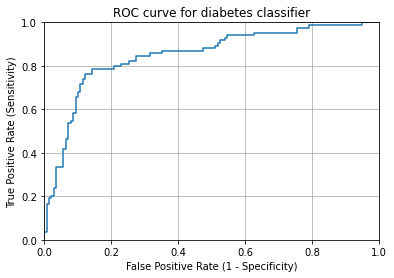

In [38]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- ROC curve can help you to **choose a threshold** that balances sensitivity and specificity in a way that makes sense for your particular context
- You can't actually **see the thresholds** used to generate the curve on the ROC curve itself

In [39]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [40]:
evaluate_threshold(0.5)

Sensitivity: 0.8095238095238095
Specificity: 0.7697841726618705


In [41]:
evaluate_threshold(0.3)

Sensitivity: 0.8452380952380952
Specificity: 0.7266187050359711


AUC is the **percentage** of the ROC plot that is **underneath the curve**:

In [42]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8490065090784515


- AUC is useful as a **single number summary** of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a **higher predicted probability** to the positive observation.
- AUC is useful even when there is **high class imbalance** (unlike classification accuracy).

In [43]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

C:\Users\Kostas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kostas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.8244458591517414

**Confusion matrix advantages:**

- Allows you to calculate a **variety of metrics**
- Useful for **multi-class problems** (more than two response classes)

**ROC/AUC advantages:**

- Does not require you to **set a classification threshold**
- Still useful when there is **high class imbalance**

# Cross validation
## KFOLD

In K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model. As can be seen, every data point gets to be in a validation set exactly once, and gets to be in a training set k-1 times. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set

<img src="https://cdn-images-1.medium.com/max/1600/1*me-aJdjnt3ivwAurYkB7PA.png">

\begin{exercise}
Implement the KFOLD method for the above dataset using sklearn

\end{exercise}


## Confusion Matrix Resources

- Blog post: [Simple guide to confusion matrix terminology](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by me
- Videos: [Intuitive sensitivity and specificity](https://www.youtube.com/watch?v=U4_3fditnWg) (9 minutes) and [The tradeoff between sensitivity and specificity](https://www.youtube.com/watch?v=vtYDyGGeQyo) (13 minutes) by Rahul Patwari
- Notebook: [How to calculate "expected value"](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb) from a confusion matrix by treating it as a cost-benefit matrix (by Ed Podojil)
- Graphic: How [classification threshold](https://media.amazonwebservices.com/blog/2015/ml_adjust_model_1.png) affects different evaluation metrics (from a [blog post](https://aws.amazon.com/blogs/aws/amazon-machine-learning-make-data-driven-decisions-at-scale/) about Amazon Machine Learning)


## ROC and AUC Resources

- Video: [ROC Curves and Area Under the Curve](https://www.youtube.com/watch?v=OAl6eAyP-yo) (14 minutes) by me, including [transcript and screenshots](http://www.dataschool.io/roc-curves-and-auc-explained/) and a [visualization](http://www.navan.name/roc/)
- Video: [ROC Curves](https://www.youtube.com/watch?v=21Igj5Pr6u4) (12 minutes) by Rahul Patwari
- Paper: [An introduction to ROC analysis](http://people.inf.elte.hu/kiss/13dwhdm/roc.pdf) by Tom Fawcett
- Usage examples: [Comparing different feature sets](http://research.microsoft.com/pubs/205472/aisec10-leontjeva.pdf) for detecting fraudulent Skype users, and [comparing different classifiers](http://www.cse.ust.hk/nevinZhangGroup/readings/yi/Bradley_PR97.pdf) on a number of popular datasets

## Other Resources

- scikit-learn documentation: [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- Guide: [Comparing model evaluation procedures and metrics](https://github.com/justmarkham/DAT8/blob/master/other/model_evaluation_comparison.md) by me
- Video: [Counterfactual evaluation of machine learning models](https://www.youtube.com/watch?v=QWCSxAKR-h0) (45 minutes) about how Stripe evaluates its fraud detection model, including [slides](http://www.slideshare.net/MichaelManapat/counterfactual-evaluation-of-machine-learning-models)